In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# Read the data. We do not need the header and date column of the file
# Change the path if required
fp = open("../data/EW-MAX.csv")
data = np.array([[float(i.strip()) for i in line.split(',')[1:]] for line in fp.readlines()[1:]])

print(data[0])

[3.81250e+00 4.15625e+00 3.81250e+00 4.12500e+00 4.12500e+00 3.67560e+06]


### Preprocessing

In [4]:
# Remove Volume feature
data = data[:,:5]
print(data[0])

[3.8125  4.15625 3.8125  4.125   4.125  ]


In [5]:
# One day ahead prediction using data of previous three days
new_data = list()
for i in range(2, len(data)):
    new_data.append(np.concatenate((data[i], data[i-1], data[i-2])))

In [6]:
# Since we are going to predict one day ahead, the last sample is not required
X, Y = np.array(new_data), np.zeros(len(new_data)-1)

In [16]:
# Now perform labelling. Given yesterday's closing price, predict today's opening high and low
tmp_y = list()
for i in range(len(X)-1):
    # Opening price is higher than closing price
    if X[i][3] - X[i+1][0] < 0:
        Y[i] = 1
    tmp_y.append(X[i][3] - X[i+1][0])

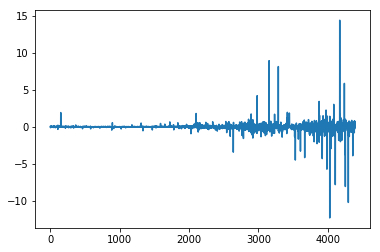

In [17]:
plt.plot([i for i in range(1, len(tmp_y)+1)], tmp_y)
plt.xlabel('Time')
plt.xlabel("Difference in Today's and Tomorrow's opening")
plt.show()

In [9]:
# We can now remove the last sample
X = X[:-1, :]

In [10]:
# Perform a train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
scaler1 = StandardScaler()
X_train, X_test = scaler1.fit_transform(X_train), scaler1.transform(X_test)

### Prediction

In [15]:
# Perform predictions
# Check out both svm and decision tree. Try adding polynomial features and see which gives best results.
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU

lr = LeakyReLU()

model = Sequential()
model.add(Dense(units=100, input_dim=len(X_train[0]), activation=lr))
model.add(Dense(units=15, activation=lr))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32, shuffle=True)
preds = model.predict(X_test)

print(accuracy_score(Y_test, np.round(preds)))

C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/10
3511/3511 [==============================] - 2s 528us/step - loss: 0.6929 - acc: 0.5449
Epoch 2/10
3511/3511 [==============================] - 1s 348us/step - loss: 0.6893 - acc: 0.5480
Epoch 3/10
3511/3511 [==============================] - 2s 429us/step - loss: 0.6891 - acc: 0.5332
Epoch 4/10
3511/3511 [==============================] - 2s 438us/step - loss: 0.6874 - acc: 0.5463
Epoch 5/10
3511/3511 [==============================] - 2s 431us/step - loss: 0.6876 - acc: 0.5451
Epoch 6/10
3511/3511 [==============================] - 2s 428us/step - loss: 0.6878 - acc: 0.5414
Epoch 7/10
3511/3511 [==============================] - 2s 430us/step - loss: 0.6884 - acc: 0.5392
Epoch 8/10
3511/3511 [==============================] - 1s 399us/step - loss: 0.6880 - acc: 0.5409
Epoch 9/10
3511/3511 [==============================] - 1s 287us/step - loss: 0.6871 - acc: 0.5343
Epoch 10/10
3511/3511 [==============================] - 1s 426us/step - loss: 0.6878 - acc: 0.5457
0.5466970